In [35]:
import sys,os
sys.path.append(os.path.join(os.path.dirname('__file__'), 'freesound-python/'))

import freesound
client = freesound.FreesoundClient()
client.set_token("1Dio5sf5Kq7uxPPi4WSQljr4EncEzRjuVdlMV8z8","token")

from utilities import *

params=AnalysisParams(200,100,'hann',2048,44100,12)
numBins = params.numBins

audioDir = 'audio/'
annotationsDir = 'scale_annotations/'
dataDir = 'data/'

In [33]:
dataDict = createDataStructure(annotationsDir,numBins)

In [36]:
chromaList = []
for fileName, parts in dataDict.items():
    for part in parts:
        computeFeaturesNNLSGlobal(part,params)
        
pickleProtocol=1#choosen for backward compatibility
with open('ExtractedFeatures_withNNLS.pkl' , 'wb') as f:
    pickle.dump(dataDict, f, pickleProtocol)        
        

In [37]:
generateCSVNNLS('ExtractedFeatures_withNNLS.pkl',dataDir)        

This process might take a while (5-10 min) 
 CROSS-VALIDATION & TRAINING 
Accuracy score for the Feature Set : 
F-measure (mean,std) --- FINAL
0.8 0.075990309085
Accuracy (mean,std) FINAL
0.82 0.0698569967863
['altered', 'dorian', 'hminor', 'hwdiminished', 'locrian', 'lydian', 'lydianb7', 'major', 'minor', 'mixolydian', 'mminor', 'phrygian']
Confusion matrix, without normalization


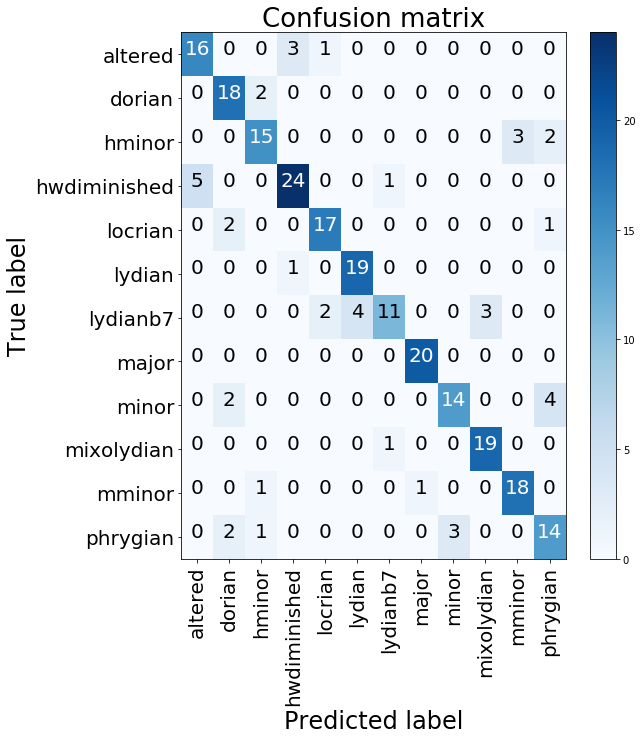

In [38]:
Classification('CSVfilefor_NNLS1.csv', dataDir)

In [ ]:
fileDir = 'chord-scale_exercise/'
abc = FeatureExtraction_singleNNLS('scalesexercise_solo1.mp3',fileDir,params,'exercise.json')

In [ ]:
abc

In [ ]:
fileDir = 'chord-scale_exercise/'
trained =TrainANDPredict('CSVfilefor_NNLS.csv','CSVfilefor_singlefile.csv','chord-scale_exercise/')
trained

In [39]:
#### count the number of data per scale
count = 0
for file, parts in dataDict.items():
    for part in parts:
        if part['groundtruth']['scaleType'].split(':')[1] == 'lydianb7':
            count = count + 1
print(count)

20
